In [1]:
# Start by importing some useful libraries

import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt 
import mglearn 
from IPython.display import display


In [2]:
f = open("iris_data.txt", "r")
print(f.read())

5.1 3.5 1.4 0.2
4.9 3.0 1.4 0.2
4.7 3.2 1.3 0.2
4.6 3.1 1.5 0.2
5.0 3.6 1.4 0.2
5.4 3.9 1.7 0.4
4.6 3.4 1.4 0.3
5.0 3.4 1.5 0.2
4.4 2.9 1.4 0.2
4.9 3.1 1.5 0.1
5.4 3.7 1.5 0.2
4.8 3.4 1.6 0.2
4.8 3.0 1.4 0.1
4.3 3.0 1.1 0.1
5.8 4.0 1.2 0.2
5.7 4.4 1.5 0.4
5.4 3.9 1.3 0.4
5.1 3.5 1.4 0.3
5.7 3.8 1.7 0.3
5.1 3.8 1.5 0.3
5.4 3.4 1.7 0.2
5.1 3.7 1.5 0.4
4.6 3.6 1.0 0.2
5.1 3.3 1.7 0.5
4.8 3.4 1.9 0.2
5.0 3.0 1.6 0.2
5.0 3.4 1.6 0.4
5.2 3.5 1.5 0.2
5.2 3.4 1.4 0.2
4.7 3.2 1.6 0.2
4.8 3.1 1.6 0.2
5.4 3.4 1.5 0.4
5.2 4.1 1.5 0.1
5.5 4.2 1.4 0.2
4.9 3.1 1.5 0.1
5.0 3.2 1.2 0.2
5.5 3.5 1.3 0.2
4.9 3.1 1.5 0.1
4.4 3.0 1.3 0.2
5.1 3.4 1.5 0.2
5.0 3.5 1.3 0.3
4.5 2.3 1.3 0.3
4.4 3.2 1.3 0.2
5.0 3.5 1.6 0.6
5.1 3.8 1.9 0.4
4.8 3.0 1.4 0.3
5.1 3.8 1.6 0.2
4.6 3.2 1.4 0.2
5.3 3.7 1.5 0.2
5.0 3.3 1.4 0.2
7.0 3.2 4.7 1.4
6.4 3.2 4.5 1.5
6.9 3.1 4.9 1.5
5.5 2.3 4.0 1.3
6.5 2.8 4.6 1.5
5.7 2.8 4.5 1.3
6.3 3.3 4.7 1.6
4.9 2.4 3.3 1.0
6.6 2.9 4.6 1.3
5.2 2.7 3.9 1.4
5.0 2.0 3.5 1.0
5.9 3.0 4.2 1.5
6.0 2.2 

In [3]:
f = open("iris_target.txt", "r")
print(f.read())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2





Müller, Andreas C.; Guido, Sarah. Introduction to Machine Learning with Python (p. 20-70). O'Reilly Media. Kindle Edition. 

In [2]:
# I will use the classical iris dataset from scikit-learn as a model for ionosphere

from sklearn.datasets import load_iris 
iris_dataset = load_iris()



In [3]:
# The Bunch object returned contains keys and values

print(" Keys of iris_dataset:\ n", iris_dataset.keys())



 Keys of iris_dataset:\ n dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
# DESC is a short description of the dataset

print( iris_dataset["DESCR"][: 193] + "\ n...")



.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre\ n...


In [7]:
# The value of the key target_names is an array of strings, containing the species of iris flowers we want to predict

print("Target names:", iris_dataset["target_names"])



Target names: ['setosa' 'versicolor' 'virginica']


In [8]:
# The value of feature_names is a list of strings, giving the description of each iris flower feature

print(" Feature names:\ n", iris_dataset["feature_names"])

 Feature names:\ n ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# The data itself is contained in the target and data fields, in a NumPy array

print(" Type of data:", type( iris_dataset['data']))

 Type of data: <class 'numpy.ndarray'>


In [10]:
# The rows in the data array correspond to flowers, while the columns represent the four measurements that were taken for each flower:

print(" Shape of data:", iris_dataset['data']. shape)


 Shape of data: (150, 4)


In [12]:
# The array contains measurements for 150 different flowers. 
# Remember that the individual items are called samples in machine learning, and their properties are called features.
# The shape of the data array is the number of samples times the number of features.
# Here are the feature values for the first five samples:

print("First five rows of data:\n", iris_dataset['data'][: 5])


First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [14]:
# From this data, we can see that all of the first five flowers have a petal width of 0.2 cm and that the first flower has the longest sepal, at 5.1 cm.
# The target array contains the species of each of the flowers that were measured, also as a NumPy array:

print("Type of target:",type(iris_dataset['target']))



Type of target: <class 'numpy.ndarray'>


In [15]:
# Target is a one-dimensional array, with one entry per flower.

print("Shape of target:",iris_dataset['target']. shape)



Shape of target: (150,)


In [16]:
# The species are encoded as integers from 0 to 2:

print(" Target:\n", iris_dataset['target'])

 

 Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The meanings of the numbers are given by the iris[' target_names'] array: 0 means setosa, 1 means versicolor, and 2 means virginica.



We need to train and test the data. Before we can apply our model to new measurements, we need to know whether it actually works,that is, whether we should trust its predictions. We cannot use the data we used to build the model to evaluate it. This is because our model can always simply remember the whole training set, and will therefore always predict the correct label for any point in the training set. To assess the model’s performance, we show it new data (data that it hasn’t seen before) for which we have labels. This is usually done by splitting the labeled data we have collected (here, 150 flower measurements) into two parts. One part of the data is used to build our machine learning model, and is called the training data or training set. The rest of the data will be used to assess how well the model works; this is called the test data, test set, or hold-out set.

Scikit-learn contains a function that shuffles the dataset and splits it for you: the train_test_split function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set.







In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( iris_dataset['data'], iris_dataset['target'], random_state = 0)

Using a test set containing only one of the three classes would not tell us much about how well our model generalizes, so we shuffle our data to make sure the test data contains data from all classes.



To make sure that we will get the same output if we run the same function several times, we provide the pseudorandom number generator with a fixed seed using the random_state parameter.



In [18]:
# All NumPy arrays X_train contains 75% of the rows of the dataset
 
print("X_train shape:", X_train.shape) 
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [19]:
# X_test contains the remaining 25%

print(" X_test shape:", X_test.shape) 
print(" y_test shape:", y_test.shape)

 X_test shape: (38, 4)
 y_test shape: (38,)


First thing to do before building a machine learning model, we need to look at the data, to find abnormalities and peculiarities. Maybe some of your irises were measured using inches and not centimeters, for example. In the real world, inconsistencies in the data and unexpected measurements are very common.

One of the best ways to inspect data is to visualize it, using a scatterplot. Computer screens have only two dimensions, which allows us to plot only two (or maybe three) features at a time.



 

In [20]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000143CF022248>,
      dtype=object)

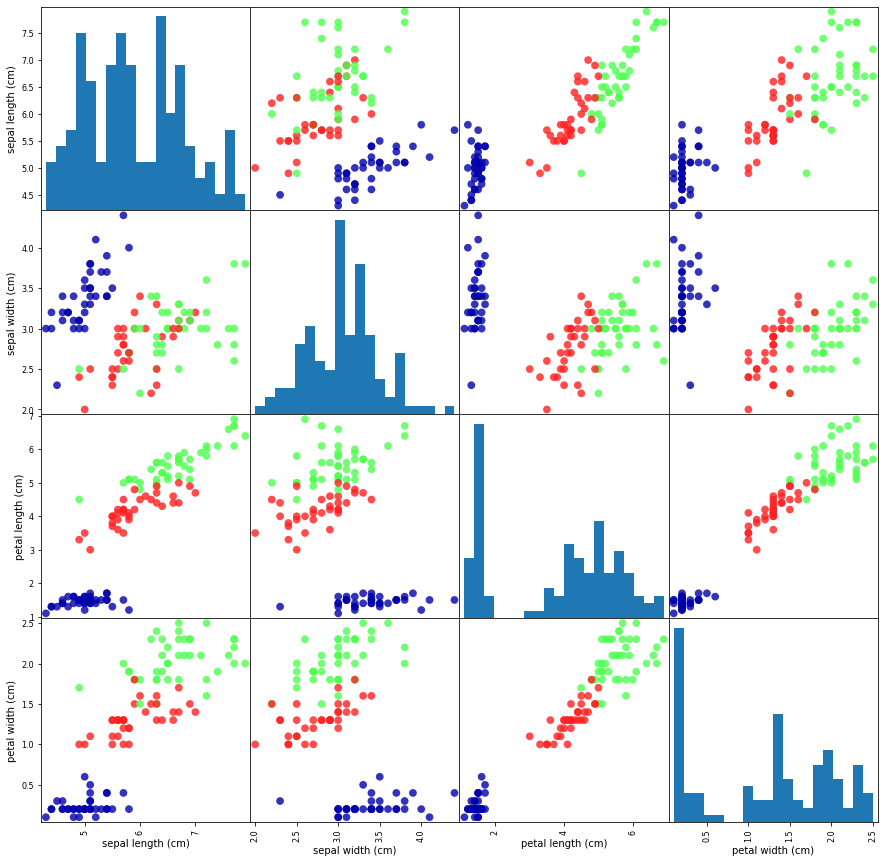

In [21]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names

iris_dataframe = pd.DataFrame( X_train, columns = iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train

pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize =( 15, 15),
marker ='0', hist_kwds ={'bins': 20}, s = 60, alpha = .8, cmap = mglearn.cm3)

The three classes seem to be relatively well separated using the sepal and petal measurements. This means that a machine learning model will likely be able to learn to separate them.



Building the First Model: k-Nearest Neighbors



Building this model only consists of storing the training set. To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.
The k in k-nearest neighbors signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (for example, the closest three or five neighbors). Then, we can make a prediction using the majority class among these neighbors. 

Before we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The most important parameter of KNeighborsClassifier is the number of neighbors, which we will set to 1.





In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

 

The knn object encapsulates the algorithm that will be used to build the model from the training data, as well the algorithm to make predictions on new data points.





In [23]:
# To build the model on the training set, we call the fit method of the knn object,
# which takes as arguments the NumPy array X_train containing the training data and the NumPy array y_train of the corresponding training labels:

knn.fit( X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

The fit method returns the knn object itself (and modifies it in place), so we get a string representation of our classifier. The representation shows us which parameters were used in creating the model.



In [24]:
# We can now make predictions using this model on new data for which we might not know the correct labels.

X_new = np.array([[ 5, 2.9, 1, 0.2]]) 
print(" X_new.shape:", X_new.shape)



 X_new.shape: (1, 4)


Note that we made the measurements of this single flower into a row in a two-dimensional NumPy array, as scikit-learn always expects two-dimensional arrays for the data.



In [27]:
# To make a prediction, we call the predict method of the knn object:

prediction = knn.predict( X_new) 
print(" Prediction:",prediction) 
print(" Predicted target name:",iris_dataset['target_names'][prediction])



 Prediction: [0]
 Predicted target name: ['setosa']


The model predicts that this new iris belongs to the class 0, meaning its species is setosa.



But how do we know whether we can trust our model?
We need to evaluate the model


In [28]:
# We can measure how well the model works by computing the accuracy

y_pred = knn.predict(X_test) 
print("Test set predictions:\n",y_pred)



Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [29]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))


Test set score: 0.97


In [30]:
# We can also use the score method of the knn object, which will compute the test set accuracy

print("Test set score: {:.2f}".format(knn.score(X_test,y_test)))



Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new irises.


I had to use the iris dataset to have a full overview of how it works

In [1]:
# For my own curiosity, i've open and read ionosphere file in full 

f = open("ionosphere.txt", "r")
print(f.read())

1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,+1
1,0,1,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,-1
1,0,1,-0.03365,1,0.00485,1,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,+1
1,0,1,-0.45161,1,1,0.71216,-1,0,0,0,0,0,0,-1,0.14516,0.54094,-0.39330,-1,-0.54467,-0.69975,1,0,0,1,0.90695,0.51613,1,1,-0.20099,0.25682,1,-0.32382,1,-1
1,0,1,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.7

In [31]:
# Let us read ionosphere using genfromtxt and output the first three rows

X = np.genfromtxt("ionosphere.txt", delimiter=",")
X[:3]

array([[ 1.     ,  0.     ,  0.99539, -0.05889,  0.85243,  0.02306,
         0.83398, -0.37708,  1.     ,  0.0376 ,  0.85243, -0.17755,
         0.59755, -0.44945,  0.60536, -0.38223,  0.84356, -0.38542,
         0.58212, -0.32192,  0.56971, -0.29674,  0.36946, -0.47357,
         0.56811, -0.51171,  0.41078, -0.46168,  0.21266, -0.3409 ,
         0.42267, -0.54487,  0.18641, -0.453  ,  1.     ],
       [ 1.     ,  0.     ,  1.     , -0.18829,  0.93035, -0.36156,
        -0.10868, -0.93597,  1.     , -0.04549,  0.50874, -0.67743,
         0.34432, -0.69707, -0.51685, -0.97515,  0.05499, -0.62237,
         0.33109, -1.     , -0.13151, -0.453  , -0.18056, -0.35734,
        -0.20332, -0.26569, -0.20468, -0.18401, -0.1904 , -0.11593,
        -0.16626, -0.06288, -0.13738, -0.02447, -1.     ],
       [ 1.     ,  0.     ,  1.     , -0.03365,  1.     ,  0.00485,
         1.     , -0.12062,  0.88965,  0.01198,  0.73082,  0.05346,
         0.85443,  0.00827,  0.54591,  0.00299,  0.83775, -0.13644

We had to say explicitly that the delimiter in this file is the comma. The features look
fine, the labels are floating point numbers rather than integers.
From Out[1], we can see that the number of features is 34. 
Let us load the features (X) and the labels (y) separately.

In [32]:
# The following code extracts only the samples, outputing the first three rows

X = np.genfromtxt("ionosphere.txt", delimiter=",",
usecols=np.arange(34))
X[:3]


array([[ 1.     ,  0.     ,  0.99539, -0.05889,  0.85243,  0.02306,
         0.83398, -0.37708,  1.     ,  0.0376 ,  0.85243, -0.17755,
         0.59755, -0.44945,  0.60536, -0.38223,  0.84356, -0.38542,
         0.58212, -0.32192,  0.56971, -0.29674,  0.36946, -0.47357,
         0.56811, -0.51171,  0.41078, -0.46168,  0.21266, -0.3409 ,
         0.42267, -0.54487,  0.18641, -0.453  ],
       [ 1.     ,  0.     ,  1.     , -0.18829,  0.93035, -0.36156,
        -0.10868, -0.93597,  1.     , -0.04549,  0.50874, -0.67743,
         0.34432, -0.69707, -0.51685, -0.97515,  0.05499, -0.62237,
         0.33109, -1.     , -0.13151, -0.453  , -0.18056, -0.35734,
        -0.20332, -0.26569, -0.20468, -0.18401, -0.1904 , -0.11593,
        -0.16626, -0.06288, -0.13738, -0.02447],
       [ 1.     ,  0.     ,  1.     , -0.03365,  1.     ,  0.00485,
         1.     , -0.12062,  0.88965,  0.01198,  0.73082,  0.05346,
         0.85443,  0.00827,  0.54591,  0.00299,  0.83775, -0.13644,
         0.75535, 

The option usecols chooses the columns of the data array that we wish to extract. 
As always in Python, the columns are numbered starting from 0.

In [33]:
# We can now extract the labels, outputing the first 3 labels

y = np.genfromtxt("ionosphere.txt", delimiter=",",
usecols=34, dtype='int')
y[:3]

array([ 1, -1,  1])

In [37]:
# I want to see the shape of data for the first three rows, for X and y

print(" Shape of data:", X[:3]. shape)


 Shape of data: (3, 34)


In [38]:
print(" Shape of data:", y[:3]. shape)

 Shape of data: (3,)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:351], y[:351],test_size=0.2, random_state=0)

In [40]:
X_train.shape

(280, 34)

In [41]:
y_test.shape

(71,)

In [42]:
print("X_train shape:", X_train.shape) 
print("y_train shape:", y_train.shape)

X_train shape: (280, 34)
y_train shape: (280,)


In [43]:
print(" X_test shape:", X_test.shape) 
print(" y_test shape:", y_test.shape)

 X_test shape: (71, 34)
 y_test shape: (71,)


In [47]:
# Building the first knn model- for  KNN
# Import and instantiate the class. This is when we can set parameters, like the number of neighbors to use. 
# Here, we set it to 3:

from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier( n_neighbors = 3)




In [48]:
# Now, we fit the classifier using the training set.

clf.fit( X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [49]:
# To make predictions on the test data, we call the predict method. For each data point in the test set.
# This computes its nearest neighbors in the training set and finds the most common class among these:

 print("Test set predictions:",clf.predict( X_test))



Test set predictions: [ 1  1 -1 -1 -1  1  1  1  1 -1  1  1 -1  1  1 -1 -1  1  1 -1  1  1 -1  1
  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1
  1 -1  1  1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1]


In [11]:
import mglearn


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


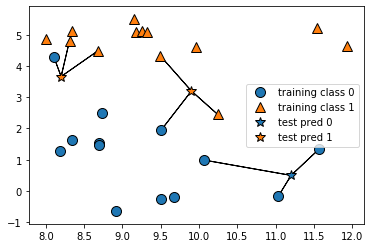

In [9]:
mglearn.plots.plot_knn_classification( n_neighbors = 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


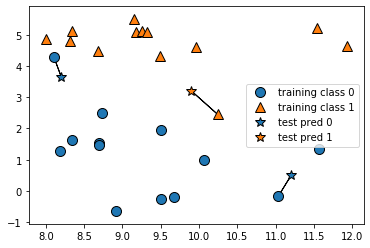

In [10]:
mglearn.plots.plot_knn_classification( n_neighbors = 1)


In [50]:
# To evaluate how well our model generalizes, we can call the score method with the test data together with the test labels:

print(" Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))



 Test set accuracy:0.89


We see that our model is about 86% accurate, meaning the model predicted the class correctly for 86% of the samples in the test dataset.



Brownlee, J., 2021. Develop k-Nearest Neighbors in Python From Scratch. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/> [Accessed 11 February 2021].

# Implementing KNN manually:


1: Calculate Euclidean Distance 2: Get Nearest Neighbors 3: Make Predictions

# Example of calculating Euclidean distance

from math import sqrt
 
Calculate the Euclidean distance between two vectors

def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i]- row2[i])**2
	return sqrt(distance)
    


# Locate the most similar neighbors

def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors
    
    


# Make a classification prediction with neighbors

def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction
    

In [4]:
# Example of calculating Euclidean distance

from math import sqrt
 
# calculate the Euclidean distance between two vectors

def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [5]:
# Locate the most similar neighbors

def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [ ]:
# Make a classification prediction with neighbors

def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction